In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tabulate import tabulate

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load data
funnel_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/funnel_path_-_funnel_path.csv')
users_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/users.csv')

In [ ]:
"""
Question 1: Basic Funnel Metrics Analysis
a. Revenue generation through funnel
b. CPA changes through funnel
c. Conversion rate through funnel
d. Efficiency rate changes
e. Visual presentation
"""

'\nQuestion 1: Basic Funnel Metrics Analysis\na. Revenue generation through funnel\nb. CPA changes through funnel\nc. Conversion rate through funnel\nd. Efficiency rate changes\ne. Visual presentation\n'

In [ ]:
# Define funnel steps and marketing costs
funnel_steps = [
    'started_navigator',
    'collect_contact_info',
    'viewed_quotes',
    'application_submit',
    'phone_connect',
    'sign_and_exam'
]

marketing_costs = {
    'paid_search_nb': 95,
    'facebook': 150,
    'instagram': 85,
    'podcast': 500,
    'tv': 400
}

In [ ]:
# Calculate initial marketing spend
users_df['marketing_cost'] = users_df['marketing_channels'].map(marketing_costs)
total_marketing_spend = users_df['marketing_cost'].sum()

# Calculate metrics for each funnel step
funnel_metrics = []
initial_users = len(funnel_df[funnel_df['funnel_steps'] == 'started_navigator']['user_id'].unique())

for step in funnel_steps:
    users_in_step = funnel_df[funnel_df['funnel_steps'] == step]['user_id'].unique()
    users_data = users_df[users_df['user_id'].isin(users_in_step)]

    num_users = len(users_in_step)

    # Revenue only at final stage
    revenue = 0
    if step == 'sign_and_exam':
        revenue = users_data['premium'].sum() * 1.36

    # Calculate metrics
    conversion_rate = (num_users / initial_users) * 100
    cpa = total_marketing_spend / num_users if num_users > 0 else 0
    efficiency = revenue / total_marketing_spend if step == 'sign_and_exam' else 0

    funnel_metrics.append({
        'step': step,
        'users': num_users,
        'revenue': revenue,
        'conversion_rate': conversion_rate,
        'cpa': cpa,
        'efficiency': efficiency
    })

metrics_df = pd.DataFrame(funnel_metrics)

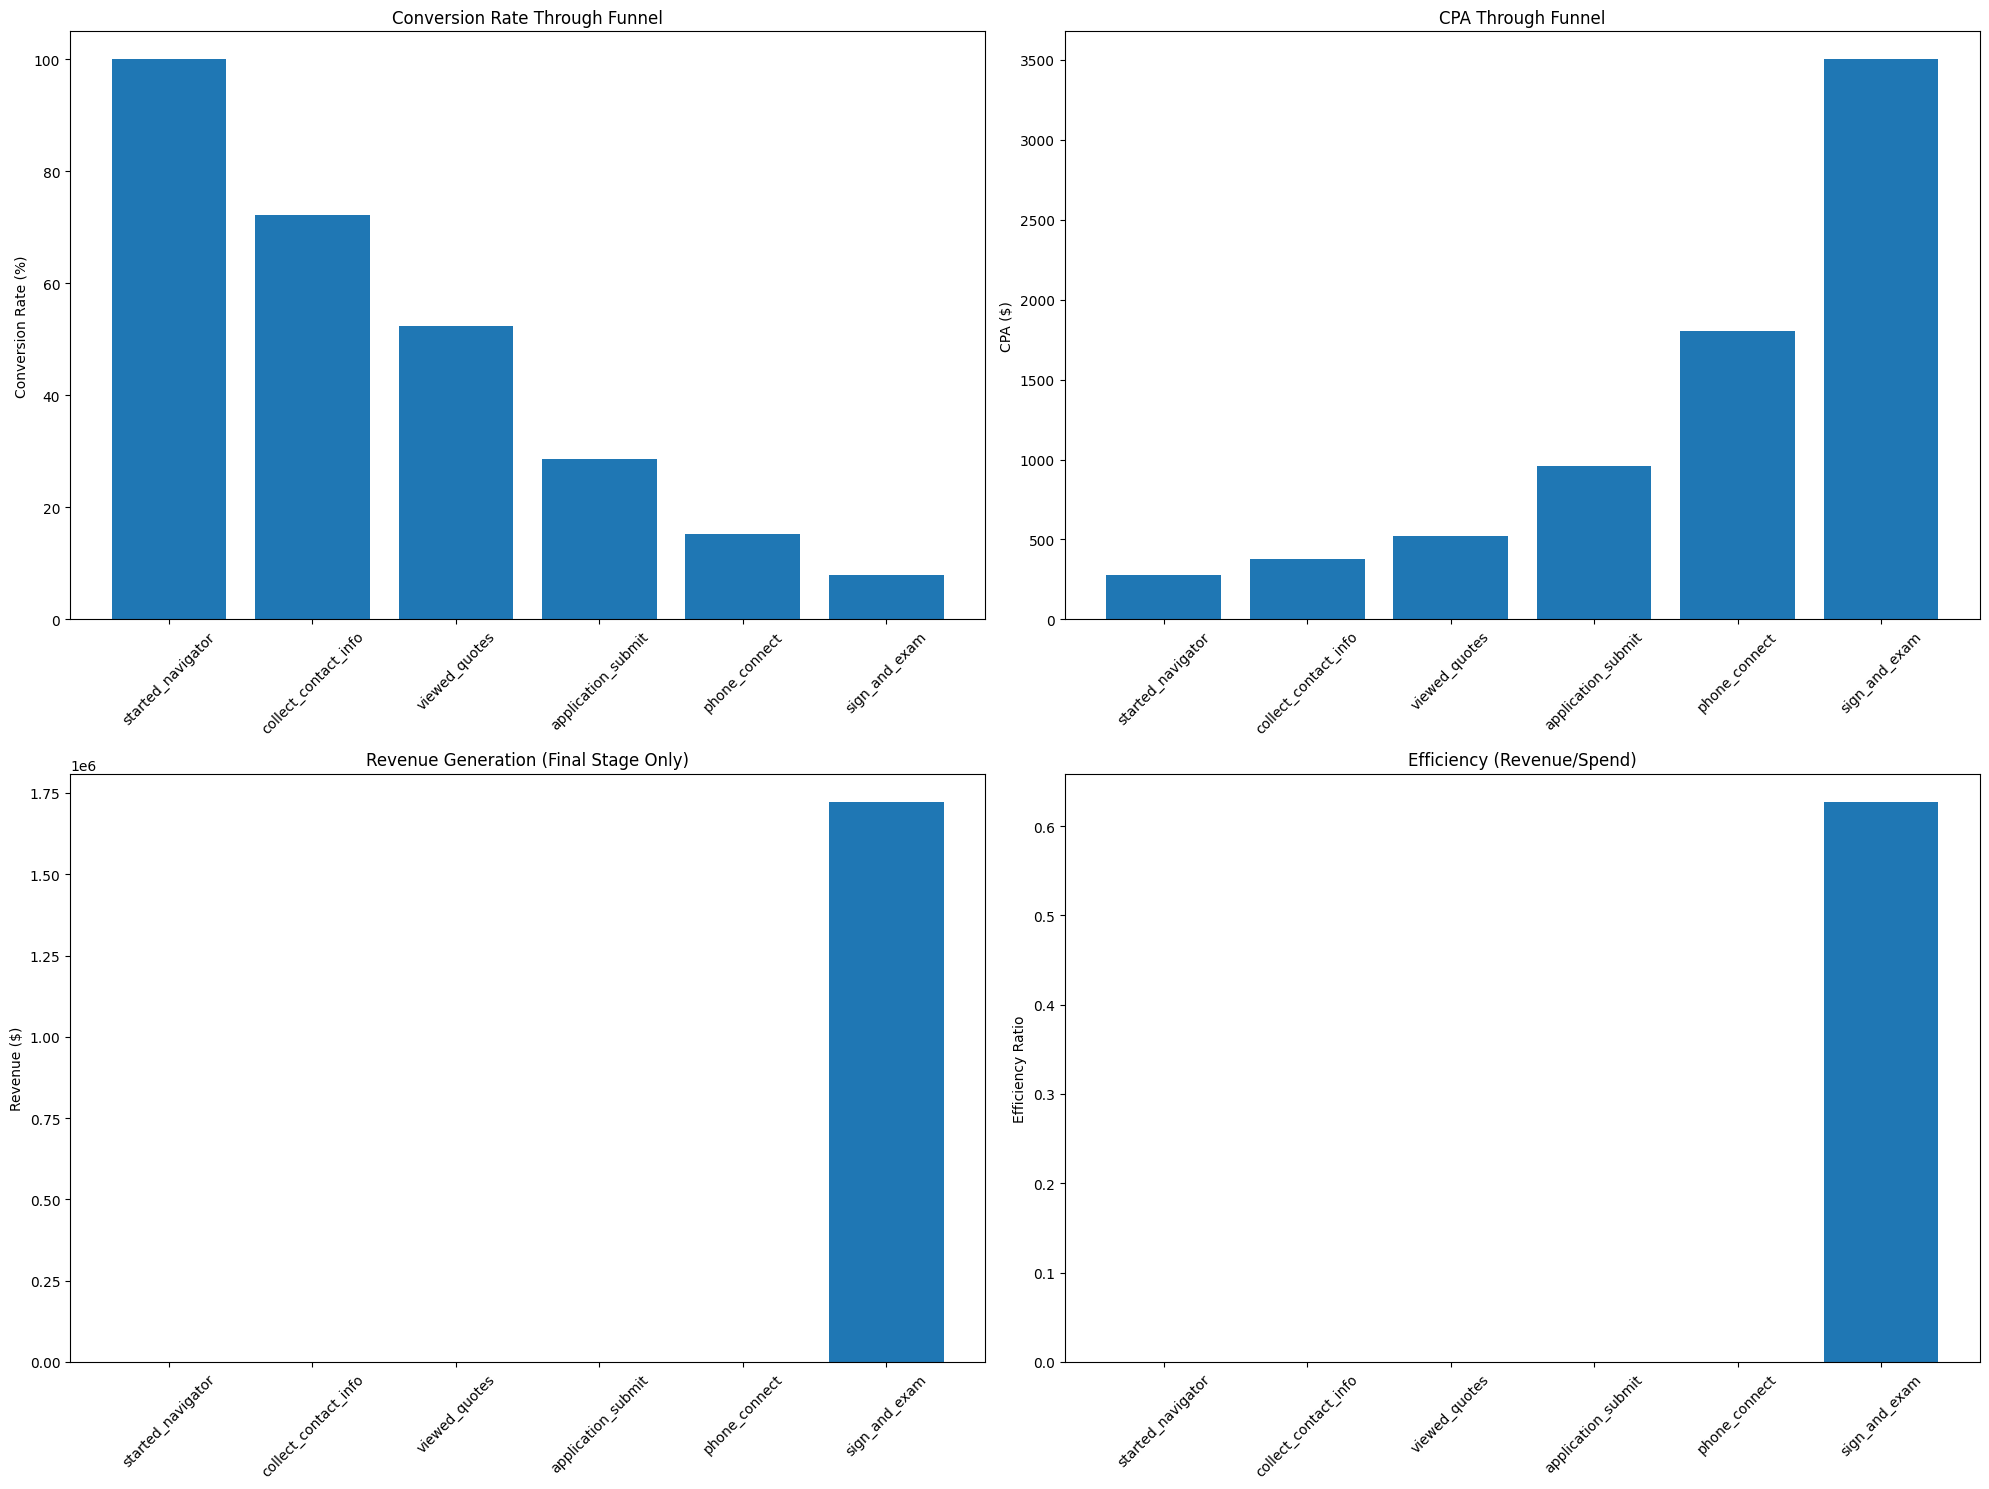

In [ ]:
# Visualizations
plt.figure(figsize=(20, 15))

# 1. Conversion Funnel
plt.subplot(2, 2, 1)
plt.bar(metrics_df['step'], metrics_df['conversion_rate'])
plt.title('Conversion Rate Through Funnel')
plt.xticks(rotation=45)
plt.ylabel('Conversion Rate (%)')

# 2. CPA Through Funnel
plt.subplot(2, 2, 2)
plt.bar(metrics_df['step'], metrics_df['cpa'])
plt.title('CPA Through Funnel')
plt.xticks(rotation=45)
plt.ylabel('CPA ($)')

# 3. Revenue at Final Stage
plt.subplot(2, 2, 3)
plt.bar(metrics_df['step'], metrics_df['revenue'])
plt.title('Revenue Generation (Final Stage Only)')
plt.xticks(rotation=45)
plt.ylabel('Revenue ($)')

# 4. Efficiency at Final Stage
plt.subplot(2, 2, 4)
plt.bar(metrics_df['step'], metrics_df['efficiency'])
plt.title('Efficiency (Revenue/Spend)')
plt.xticks(rotation=45)
plt.ylabel('Efficiency Ratio')

plt.tight_layout()
plt.show()

In [ ]:
# Create summary table for Question 1
summary_metrics = pd.DataFrame({
    'Metric': [
        'Total Users Started',
        'Final Stage Users',
        'Overall Conversion Rate',
        'Final Stage Revenue',
        'Total Marketing Spend',
        'Overall Efficiency',
        'Final Stage CPA'
    ],
    'Value': [
        initial_users,
        metrics_df.loc[metrics_df['step'] == 'sign_and_exam', 'users'].iloc[0],
        metrics_df.loc[metrics_df['step'] == 'sign_and_exam', 'conversion_rate'].iloc[0],
        metrics_df.loc[metrics_df['step'] == 'sign_and_exam', 'revenue'].iloc[0],
        total_marketing_spend,
        metrics_df.loc[metrics_df['step'] == 'sign_and_exam', 'efficiency'].iloc[0],
        metrics_df.loc[metrics_df['step'] == 'sign_and_exam', 'cpa'].iloc[0]
    ]
})

# Format the values
summary_metrics['Value'] = summary_metrics['Value'].apply(lambda x: f"{x:,.2f}" if isinstance(x, (int, float)) and 'Rate' not in summary_metrics.loc[summary_metrics['Value'] == x, 'Metric'].iloc[0] else
                                                         f"{x:,.2f}%" if isinstance(x, (int, float)) and 'Rate' in summary_metrics.loc[summary_metrics['Value'] == x, 'Metric'].iloc[0] else
                                                         f"{x:,}" if isinstance(x, (int, float)) else x)

print("\nQuestion 1 Summary:")
print("===================")
print(summary_metrics.to_string(index=False))



Question 1 Summary:
                 Metric        Value
    Total Users Started    10,000.00
      Final Stage Users       784.00
Overall Conversion Rate        7.84%
    Final Stage Revenue 1,722,745.13
  Total Marketing Spend 2,747,040.00
     Overall Efficiency         0.63
        Final Stage CPA     3,503.88


In [ ]:
# Additional summary showing step-by-step metrics
step_summary = metrics_df[['step', 'users', 'conversion_rate', 'cpa']]
step_summary = step_summary.round(2)
print("\nStep-by-Step Metrics:")
print("====================")
print(step_summary.to_string(index=False))


Step-by-Step Metrics:
                step  users  conversion_rate     cpa
   started_navigator  10000           100.00  274.70
collect_contact_info   7220            72.20  380.48
       viewed_quotes   5245            52.45  523.74
  application_submit   2855            28.55  962.19
       phone_connect   1525            15.25 1801.34
       sign_and_exam    784             7.84 3503.88


In [ ]:
print("\nKey Findings:")
print("============")
print("1. Revenue is only generated at the final 'sign_and_exam' stage")
print("2. CPA increases through the funnel as fewer users progress")
print("3. Significant drop-offs occur between key funnel stages")
print("4. Efficiency can only be measured at final stage where revenue is generated")
print("5. Marketing spend is attributed to initial acquisition")


Key Findings:
1. Revenue is only generated at the final 'sign_and_exam' stage
2. CPA increases through the funnel as fewer users progress
3. Significant drop-offs occur between key funnel stages
4. Efficiency can only be measured at final stage where revenue is generated
5. Marketing spend is attributed to initial acquisition


In [ ]:
# Save DataFrames for use in subsequent questions
metrics_df.to_pickle('metrics_df.pkl')
summary_metrics.to_pickle('summary_metrics.pkl')

In [ ]:
"""
Question 2: Feature Analysis and Segmentation
Analyzing which features are associated with conversion and identifying
efficient segments despite low conversion rates
"""

'\nQuestion 2: Feature Analysis and Segmentation\nAnalyzing which features are associated with conversion and identifying\nefficient segments despite low conversion rates\n'

In [ ]:
# Identify converted users and calculate revenue/efficiency
converted_users = funnel_df[funnel_df['funnel_steps'] == 'sign_and_exam']['user_id'].unique()
users_df['converted'] = users_df['user_id'].isin(converted_users)
users_df['revenue'] = np.where(users_df['converted'], users_df['premium'] * 1.36, 0)
users_df['efficiency'] = users_df['revenue'] / users_df['marketing_cost']

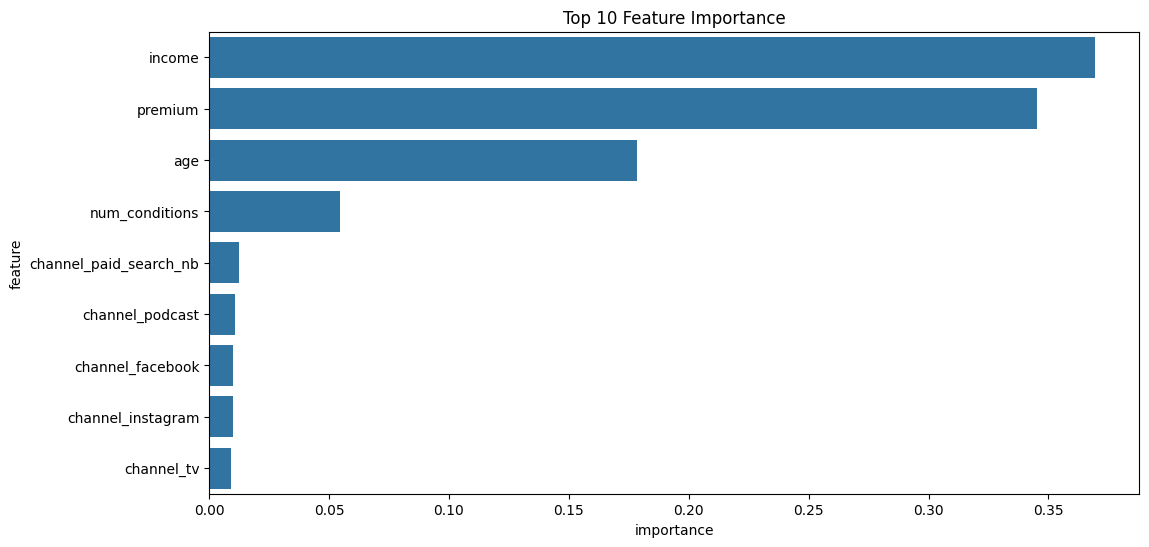

In [ ]:
# 1. Feature Importance Analysis
# Prepare features for modeling
X = users_df[['age', 'income', 'num_conditions', 'premium']]
y = users_df['converted']

# Add marketing channel dummies
marketing_channels_dummies = pd.get_dummies(users_df['marketing_channels'], prefix='channel')
X = pd.concat([X, marketing_channels_dummies], axis=1)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Random Forest for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importance')
plt.show()

In [ ]:
# 1. Feature Importance Summary
feature_importance_summary = feature_importance.head(10).round(4)
print("\nTop 10 Features by Importance:")
print("=============================")
print(feature_importance_summary.to_string(index=False))


Top 10 Features by Importance:
               feature  importance
                income      0.3693
               premium      0.3453
                   age      0.1785
        num_conditions      0.0546
channel_paid_search_nb      0.0123
       channel_podcast      0.0108
      channel_facebook      0.0101
     channel_instagram      0.0098
            channel_tv      0.0091


In [ ]:
# Function to create range labels
def get_range_label(bins, values):
    labels = []
    for i in range(len(bins)-1):
        if i == len(bins)-2:  # Last bin should include the upper bound
            labels.append(f"{int(bins[i])}-{int(bins[i+1])}")
        else:
            labels.append(f"{int(bins[i])}-{int(bins[i+1]-1)}")
    return labels

# 2. Segment Analysis
# Create segments for numerical features with value ranges
for column in ['age', 'income', 'premium']:
    # Calculate bins
    bins = pd.qcut(users_df[column], q=4, retbins=True)[1]
    # Create range labels
    range_labels = get_range_label(bins, users_df[column])
    # Assign groups
    users_df[f'{column}_group'] = pd.cut(users_df[column], bins=bins, labels=range_labels, include_lowest=True)

    # Print the ranges for reference
    print(f"\n{column.capitalize()} Ranges:")
    for label in range_labels:
        print(label)

# Analyze segments
segments = ['age_group', 'income_group', 'premium_group', 'marketing_channels', 'num_conditions']
segment_analysis = []

for segment in segments:
    analysis = users_df.groupby(segment).agg({
        'converted': 'mean',
        'revenue': 'sum',
        'marketing_cost': 'sum',
        'user_id': 'count'
    }).reset_index()

    analysis['efficiency'] = analysis['revenue'] / analysis['marketing_cost']
    analysis['segment_type'] = segment
    segment_analysis.append(analysis)


Age Ranges:
18-28
29-34
35-41
42-65

Income Ranges:
36996-113987
113988-138683
138684-171049
171050-297935

Premium Ranges:
315-1451
1452-1706
1707-1965
1966-3267


<ipython-input-16-d95c675a9293>:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis = users_df.groupby(segment).agg({
<ipython-input-16-d95c675a9293>:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis = users_df.groupby(segment).agg({
<ipython-input-16-d95c675a9293>:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis = users_df.groupby(segment).agg({


In [ ]:
from scipy.stats import chi2_contingency

# Assuming 'users_df' is your DataFrame

features = ['age_group', 'income_group', 'premium_group', 'marketing_channels', 'num_conditions']

for feature in features:
  # Create a contingency table
  contingency_table = pd.crosstab(users_df[feature], users_df['converted'])

  # Perform the Chi-squared test
  chi2, p, dof, expected = chi2_contingency(contingency_table)

  # Print results
  print(f"Feature: {feature}")
  print(f"Chi-squared statistic: {chi2}")
  print(f"P-value: {p}")

  # Interpret results
  alpha = 0.05  # Significance level
  if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship.")
  else:
    print("Fail to reject the null hypothesis. There is no significant relationship.")
  print("-" * 20)

Feature: age_group
Chi-squared statistic: 11.23427938167552
P-value: 0.010524203261296645
Reject the null hypothesis. There is a significant relationship.
--------------------
Feature: income_group
Chi-squared statistic: 136.23157596371883
P-value: 2.4542660163232594e-29
Reject the null hypothesis. There is a significant relationship.
--------------------
Feature: premium_group
Chi-squared statistic: 55.6374893707483
P-value: 5.019979907236751e-12
Reject the null hypothesis. There is a significant relationship.
--------------------
Feature: marketing_channels
Chi-squared statistic: 62.9462860725235
P-value: 6.964853353603876e-13
Reject the null hypothesis. There is a significant relationship.
--------------------
Feature: num_conditions
Chi-squared statistic: 249.71048028089453
P-value: 3.1930944173080256e-50
Reject the null hypothesis. There is a significant relationship.
--------------------


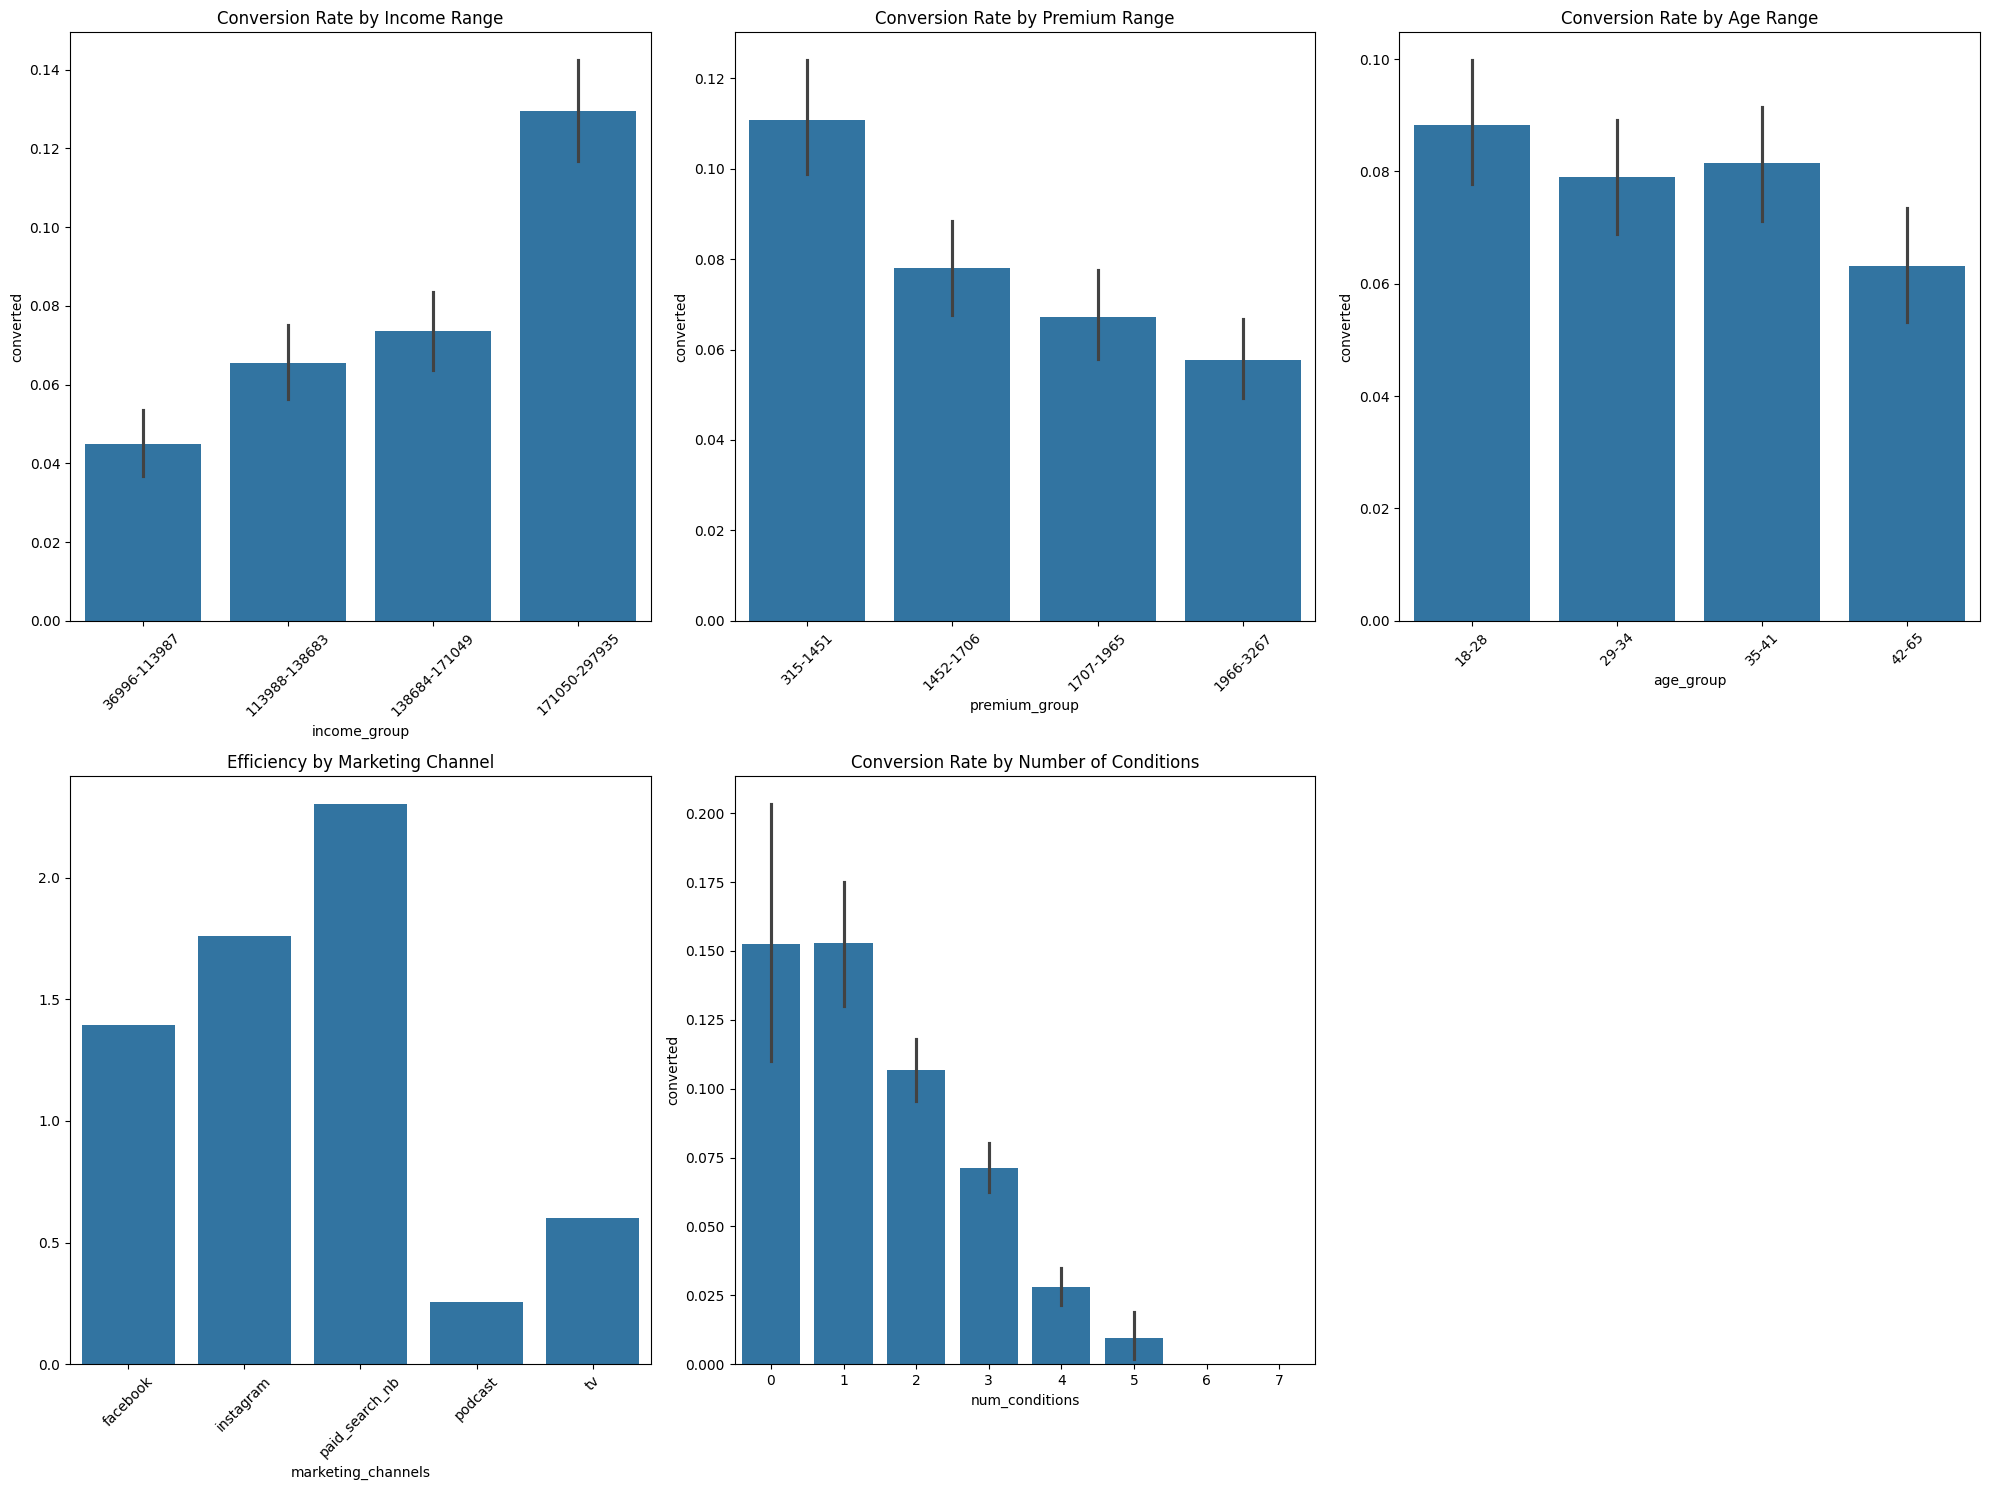

In [ ]:
# Identify interesting segments (high efficiency, low conversion)
interesting_segments = []
for analysis in segment_analysis:
    analysis['efficiency_rank'] = analysis['efficiency'].rank(ascending=False)
    analysis['conversion_rank'] = analysis['converted'].rank(ascending=False)

    interesting = analysis[
        (analysis['efficiency_rank'] <= len(analysis)/2) &
        (analysis['conversion_rank'] > len(analysis)/2)
    ].copy()

    if not interesting.empty:
        interesting_segments.append(interesting)

interesting_df = pd.concat(interesting_segments)

# Visualize segment performance
plt.figure(figsize=(20, 15))

# 1. Conversion rates by segment
plt.subplot(2, 3, 1)
sns.barplot(data=users_df, x='income_group', y='converted')
plt.title('Conversion Rate by Income Range')
plt.xticks(rotation=45)

# 2. Premium vs Conversion
plt.subplot(2, 3, 2)
sns.barplot(data=users_df, x='premium_group', y='converted')
plt.title('Conversion Rate by Premium Range')
plt.xticks(rotation=45)

# 3. Age vs Conversion
plt.subplot(2, 3, 3)
sns.barplot(data=users_df, x='age_group', y='converted')
plt.title('Conversion Rate by Age Range')
plt.xticks(rotation=45)

# 4. Efficiency by marketing channel
plt.subplot(2, 3, 4)
channel_metrics = users_df.groupby('marketing_channels')['efficiency'].mean()
sns.barplot(x=channel_metrics.index, y=channel_metrics.values)
plt.title('Efficiency by Marketing Channel')
plt.xticks(rotation=45)

# 5. Conversion vs Conditions
plt.subplot(2, 3, 5)
sns.barplot(data=users_df, x='num_conditions', y='converted')
plt.title('Conversion Rate by Number of Conditions')

plt.tight_layout()
plt.show()

In [ ]:
# 2. Segment Performance Summary
segment_summary = pd.DataFrame()

# Get top performing segments from each category
for analysis in segment_analysis:
    # Get segment type and identifier column
    segment_type = analysis['segment_type'].iloc[0]
    identifier_col = analysis.columns[0]

    # Select top segments based on efficiency
    top_segments = analysis.nlargest(2, 'efficiency').copy()

    # Calculate additional metrics
    top_segments['revenue_per_user'] = top_segments['revenue'] / top_segments['user_id']
    top_segments['cost_per_user'] = top_segments['marketing_cost'] / top_segments['user_id']

    # Select and rename columns for clarity
    summary_data = top_segments[[
        'segment_type',
        identifier_col,
        'converted',
        'efficiency',
        'revenue_per_user',
        'cost_per_user',
        'user_id'
    ]].copy()

    # Rename columns for better readability
    summary_data.columns = [
        'Segment Type',
        'Segment Value',
        'Conversion Rate',
        'Efficiency Ratio',
        'Revenue/User',
        'Cost/User',
        'User Count'
    ]

    segment_summary = pd.concat([segment_summary, summary_data])

# Sort by efficiency
segment_summary = segment_summary.sort_values('Efficiency Ratio', ascending=False)

# Store maximum values before formatting
max_conversion = segment_summary['Conversion Rate'].max()
max_efficiency = segment_summary['Efficiency Ratio'].max()
max_revenue_per_user = segment_summary['Revenue/User'].max()

# Format numeric columns for display
segment_summary_display = segment_summary.copy()
segment_summary_display['Conversion Rate'] = segment_summary_display['Conversion Rate'].map('{:.2%}'.format)
segment_summary_display['Efficiency Ratio'] = segment_summary_display['Efficiency Ratio'].map('{:.2f}'.format)
segment_summary_display['Revenue/User'] = segment_summary_display['Revenue/User'].map('${:.2f}'.format)
segment_summary_display['Cost/User'] = segment_summary_display['Cost/User'].map('${:.2f}'.format)
segment_summary_display['User Count'] = segment_summary_display['User Count'].map('{:,.0f}'.format)

# Print summary with sections
print("\nTop Performing Segments Analysis")
print("===============================")
print("\nShowing top 2 segments from each category, sorted by efficiency ratio\n")

# Display the formatted summary
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(segment_summary_display.to_string(index=False))

# Reset display options
pd.reset_option('display.max_columns')
pd.reset_option('display.width')


Top Performing Segments Analysis

Showing top 2 segments from each category, sorted by efficiency ratio

      Segment Type  Segment Value Conversion Rate Efficiency Ratio Revenue/User Cost/User User Count
marketing_channels paid_search_nb          10.09%             2.30      $218.77    $95.00      3,002
marketing_channels      instagram           6.97%             1.76      $149.70    $85.00      1,520
      income_group  171050-297935          12.96%             1.16      $322.99   $279.08      2,500
    num_conditions              1          15.30%             1.08      $274.53   $253.62      1,039
    num_conditions              2          10.67%             0.81      $224.23   $277.83      2,802
         age_group          35-41           8.15%             0.70      $190.48   $274.04      2,626
     premium_group       315-1451          11.08%             0.69      $184.80   $269.75      2,500
         age_group          29-34           7.90%             0.61      $171.47   $279

In [ ]:
"""
Question 3: Hypotheses and Recommendations
Analyzing patterns to form hypotheses and make recommendations for maximizing efficiency
"""

'\nQuestion 3: Hypotheses and Recommendations\nAnalyzing patterns to form hypotheses and make recommendations for maximizing efficiency\n'

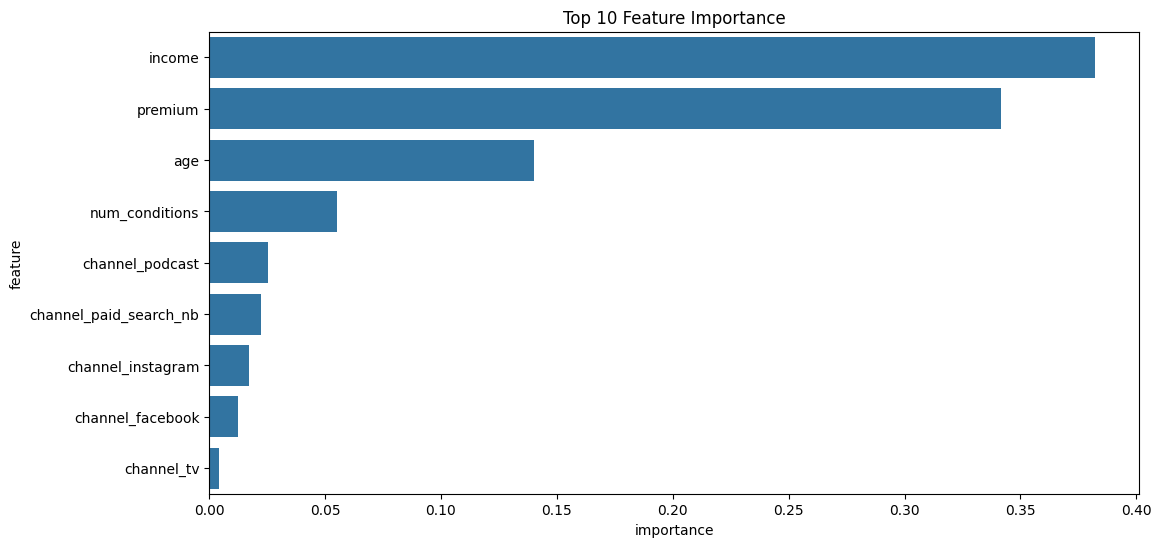

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Prepare features for modeling
X = users_df[['age', 'income', 'num_conditions', 'premium']]
y = users_df['efficiency']

# Add marketing channel dummies
marketing_channels_dummies = pd.get_dummies(users_df['marketing_channels'], prefix='channel')
X = pd.concat([X, marketing_channels_dummies], axis=1)

# Random Forest Regressor for feature importance
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importance')
plt.show()

In [ ]:
# 1. Analyze conversion patterns and efficiency by segment combinations
# Create interaction features
users_df['income_per_condition'] = users_df['income'] / (users_df['num_conditions'] + 1)
users_df['premium_to_income'] = users_df['premium'] / users_df['income']

In [ ]:
# Analyze path to conversion by segment
conversion_paths = pd.DataFrame()
for step in funnel_steps:
    users_in_step = funnel_df[funnel_df['funnel_steps'] == step]['user_id'].unique()

    # Calculate metrics by segment
    for segment in ['income_group', 'age_group', 'premium_group']:
        segment_metrics = users_df[users_df['user_id'].isin(users_in_step)].groupby(segment).agg({
            'user_id': 'count',
            'converted': 'mean',
            'efficiency': 'mean'
        }).reset_index()

        segment_metrics['step'] = step
        segment_metrics['segment_type'] = segment
        conversion_paths = pd.concat([conversion_paths, segment_metrics])

<ipython-input-23-23c339331ad1>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_metrics = users_df[users_df['user_id'].isin(users_in_step)].groupby(segment).agg({
<ipython-input-23-23c339331ad1>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_metrics = users_df[users_df['user_id'].isin(users_in_step)].groupby(segment).agg({
<ipython-input-23-23c339331ad1>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

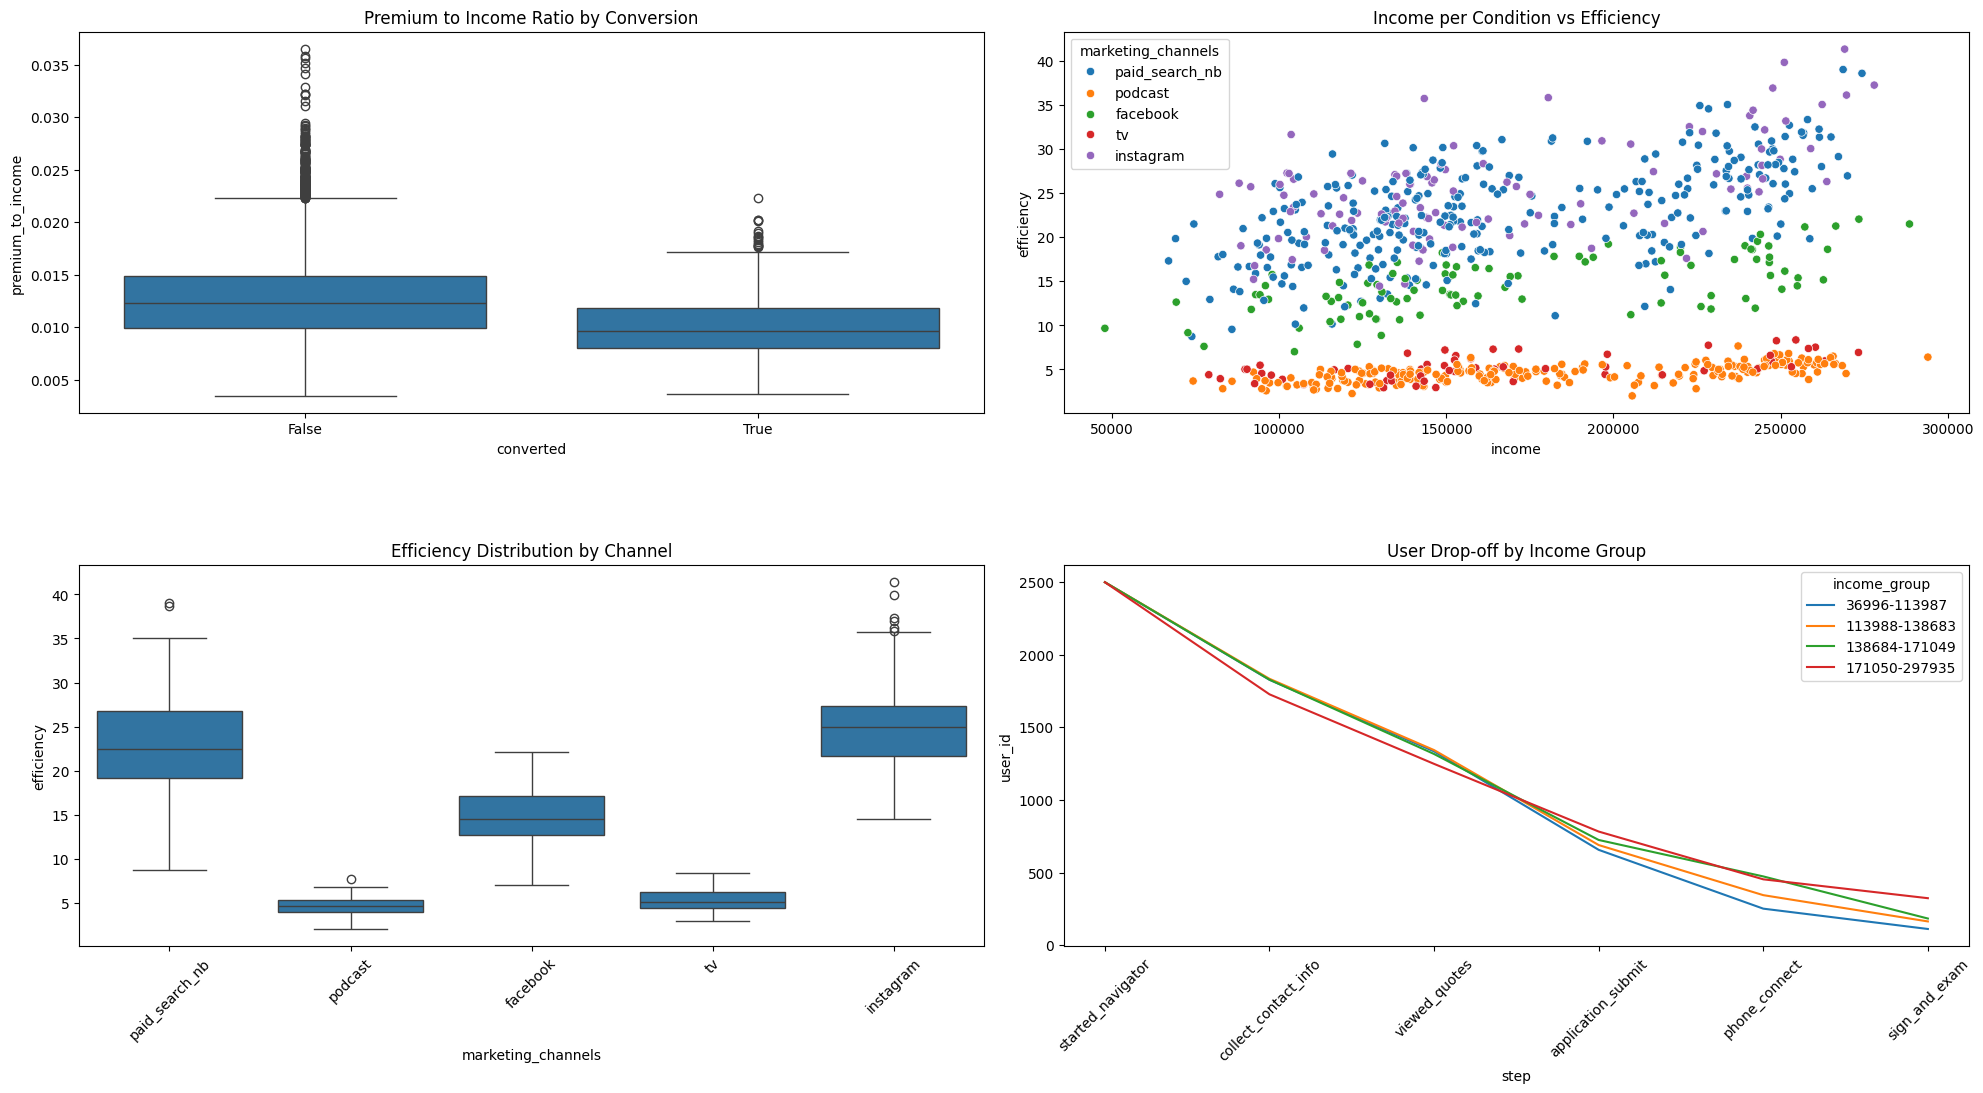

In [ ]:
# Visualize key patterns for hypothesis generation
plt.figure(figsize=(20, 15))

# 1. Premium to Income Ratio vs Conversion
plt.subplot(3, 2, 1)
sns.boxplot(data=users_df, x='converted', y='premium_to_income')
plt.title('Premium to Income Ratio by Conversion')

# 2. Income per Condition vs Efficiency
plt.subplot(3, 2, 2)
sns.scatterplot(data=users_df[users_df['converted']],
                x='income',
                y='efficiency',
                hue='marketing_channels')
plt.title('Income per Condition vs Efficiency')

# 3. Converetd Distribution
plt.subplot(3, 2, 3)
sns.boxplot(data=users_df[users_df['converted']],
            x='marketing_channels',
            y='efficiency')
plt.title('Efficiency Distribution by Channel')
plt.xticks(rotation=45)

# 4. Drop-off Patterns by Segment
plt.subplot(3, 2, 4)
pivot_data = conversion_paths[conversion_paths['segment_type'] == 'income_group']
sns.lineplot(data=pivot_data, x='step', y='user_id', hue=pivot_data['income_group'])
plt.title('User Drop-off by Income Group')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
"""
Question 4: Marketing Team Recommendations
Analyzing spend, targeting, and messaging optimizations based on previous findings
"""

'\nQuestion 4: Marketing Team Recommendations\nAnalyzing spend, targeting, and messaging optimizations based on previous findings\n'

In [ ]:
# Calculate channel-specific metrics
channel_metrics = users_df.groupby('marketing_channels').agg({
    'user_id': 'count',
    'converted': 'mean',
    'revenue': 'sum',
    'marketing_cost': 'sum',
    'income': 'mean',
    'premium': 'mean',
    'num_conditions': 'mean',
    'age': 'mean'
}).reset_index()

# Calculate efficiency metrics
channel_metrics['cpa'] = channel_metrics['marketing_cost'] / channel_metrics['user_id']
channel_metrics['efficiency'] = channel_metrics['revenue'] / channel_metrics['marketing_cost']
channel_metrics['revenue_per_user'] = channel_metrics['revenue'] / channel_metrics['user_id']

In [ ]:
# Calculate efficiency metrics
channel_metrics['cpa'] = channel_metrics['marketing_cost'] / channel_metrics['user_id']
channel_metrics['efficiency'] = channel_metrics['revenue'] / channel_metrics['marketing_cost']
channel_metrics['revenue_per_user'] = channel_metrics['revenue'] / channel_metrics['user_id']

# Calculate conversion by channel and segment
def get_channel_segment_performance(segment_col):
    performance = users_df.groupby(['marketing_channels', segment_col]).agg({
        'user_id': 'count',
        'converted': 'mean',
        'revenue': 'sum',
        'marketing_cost': 'sum'
    }).reset_index()

    performance['efficiency'] = performance['revenue'] / performance['marketing_cost']
    return performance

income_channel_performance = get_channel_segment_performance('income_group')
age_channel_performance = get_channel_segment_performance('age_group')
premium_channel_performance = get_channel_segment_performance('premium_group')

<ipython-input-27-8293a74235da>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance = users_df.groupby(['marketing_channels', segment_col]).agg({
<ipython-input-27-8293a74235da>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance = users_df.groupby(['marketing_channels', segment_col]).agg({
<ipython-input-27-8293a74235da>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance = users_df.groupby(['

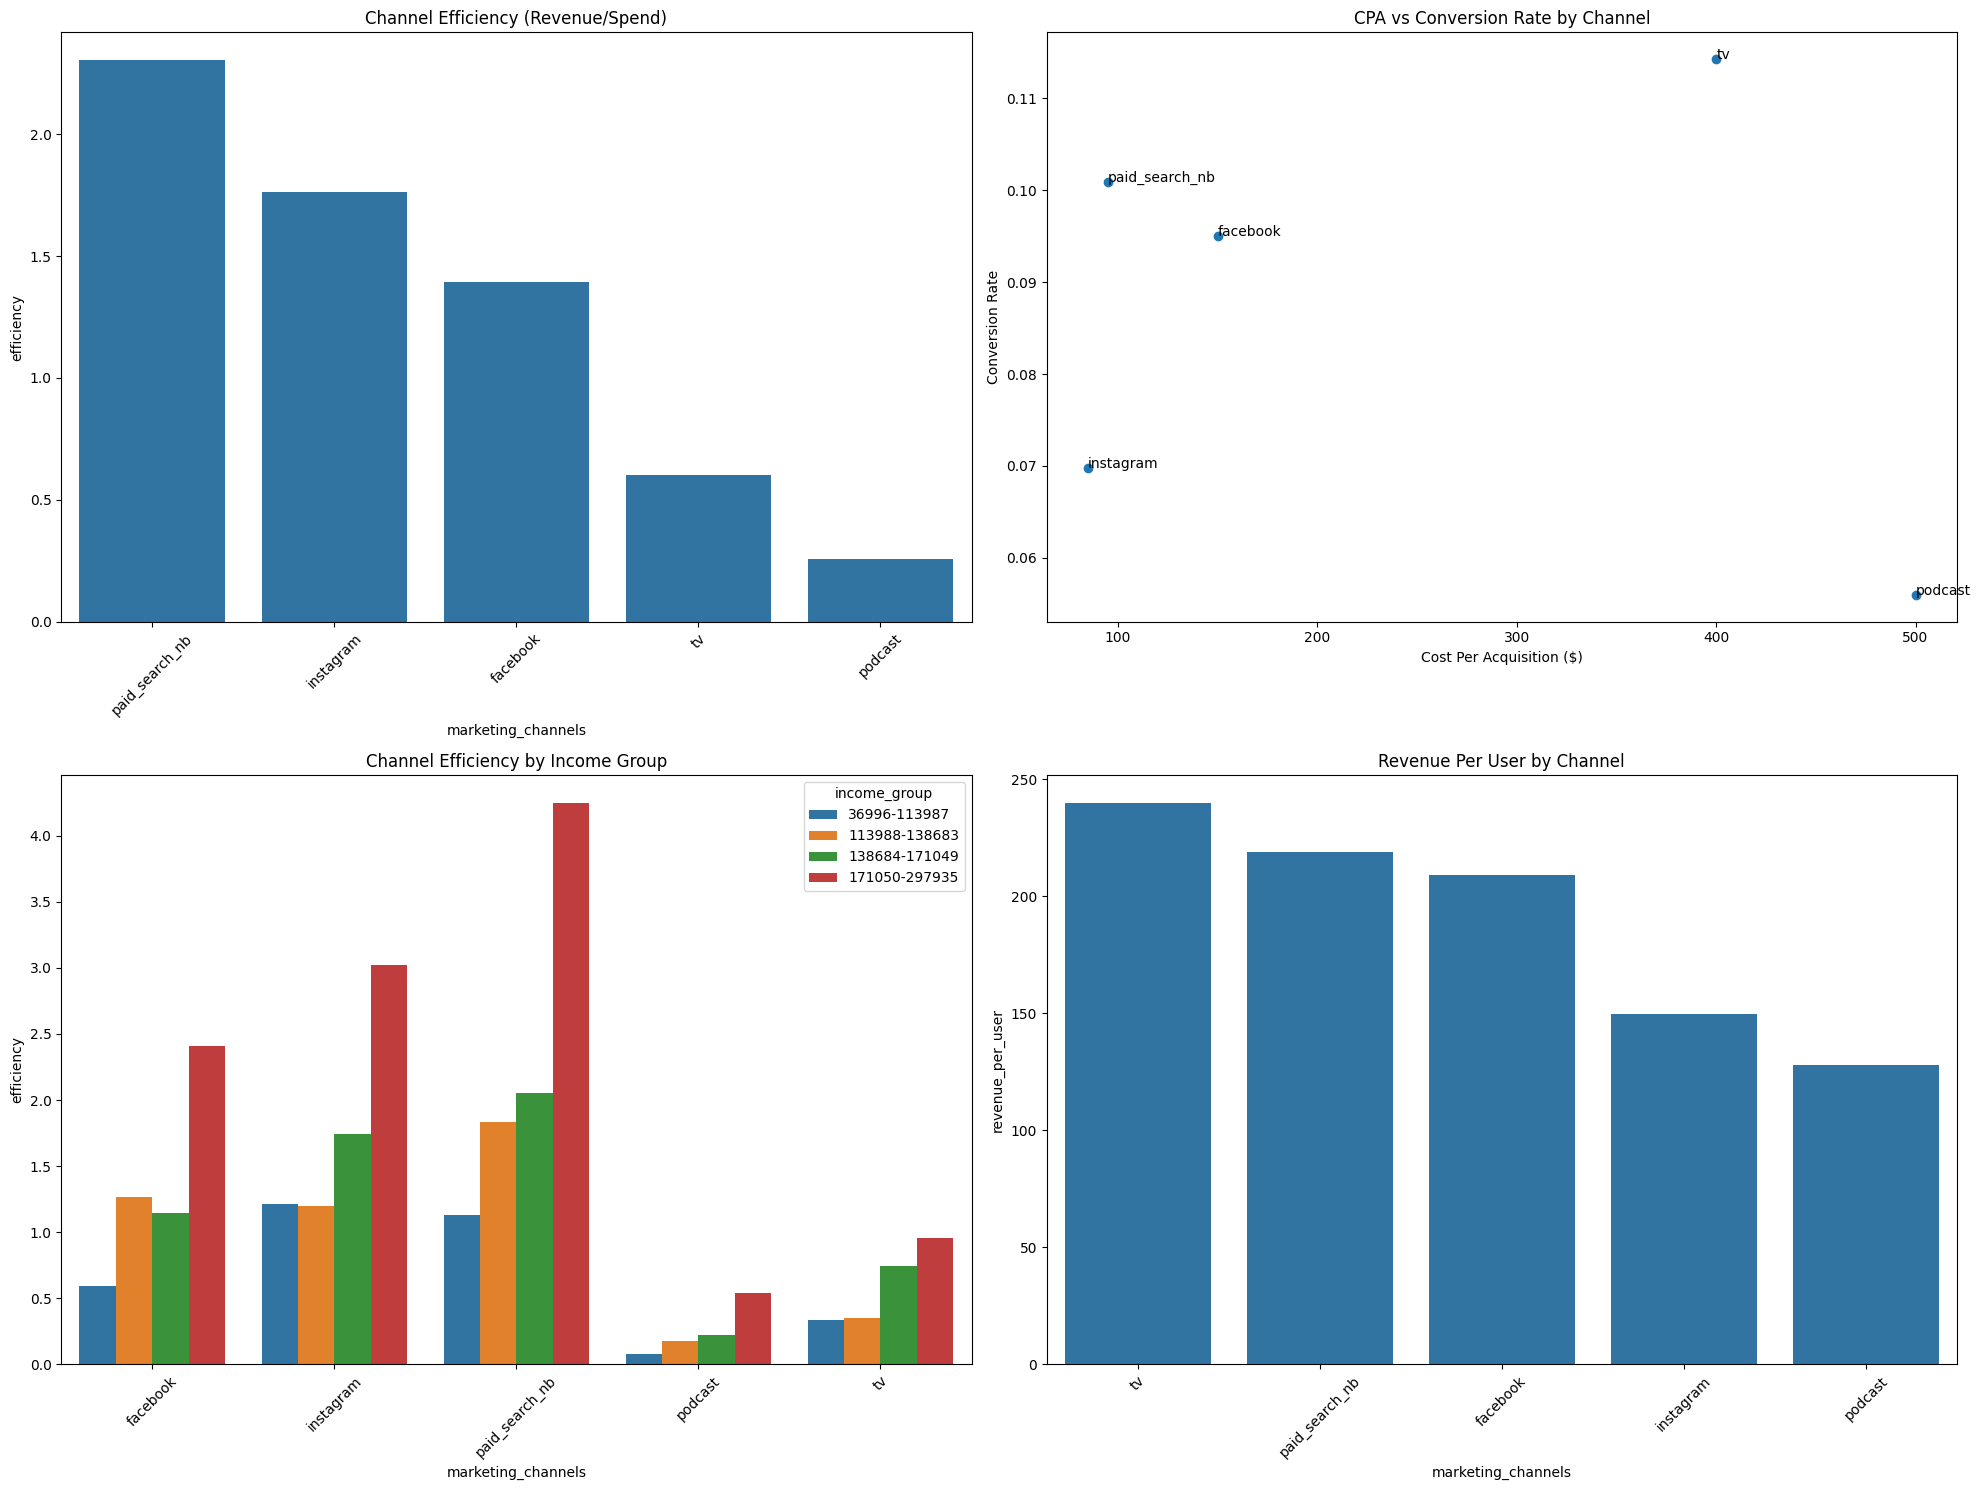

In [ ]:
# Visualize marketing insights
plt.figure(figsize=(20, 15))

# 1. Channel Efficiency Comparison
plt.subplot(2, 2, 1)
sns.barplot(data=channel_metrics.sort_values('efficiency', ascending=False),
            x='marketing_channels', y='efficiency')
plt.title('Channel Efficiency (Revenue/Spend)')
plt.xticks(rotation=45)

# 2. CPA vs Conversion Rate
plt.subplot(2, 2, 2)
plt.scatter(channel_metrics['cpa'], channel_metrics['converted'])
for i, txt in enumerate(channel_metrics['marketing_channels']):
    plt.annotate(txt, (channel_metrics['cpa'].iloc[i], channel_metrics['converted'].iloc[i]))
plt.xlabel('Cost Per Acquisition ($)')
plt.ylabel('Conversion Rate')
plt.title('CPA vs Conversion Rate by Channel')

# 3. Channel Performance by Income Group
plt.subplot(2, 2, 3)
sns.barplot(data=income_channel_performance,
            x='marketing_channels',
            y='efficiency',
            hue='income_group')
plt.title('Channel Efficiency by Income Group')
plt.xticks(rotation=45)

# 4. Revenue Per User by Channel
plt.subplot(2, 2, 4)
sns.barplot(data=channel_metrics.sort_values('revenue_per_user', ascending=False),
            x='marketing_channels', y='revenue_per_user')
plt.title('Revenue Per User by Channel')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Create channel optimization recommendations
channel_recommendations = pd.DataFrame({
    'Channel': channel_metrics['marketing_channels'],
    'Current Efficiency': channel_metrics['efficiency'],
    'Current Spend': channel_metrics['marketing_cost'],
    'Recommended Action': [
        'Increase spend' if eff > channel_metrics['efficiency'].mean() else 'Decrease spend'
        for eff in channel_metrics['efficiency']
    ],
    'Target Segments': [
        f"Income_Q{income_channel_performance[income_channel_performance['marketing_channels'] == channel]['efficiency'].idxmax() % 4 + 1}"
        for channel in channel_metrics['marketing_channels']
    ]
})

In [ ]:
# Calculate optimal budget allocation
total_budget = channel_metrics['marketing_cost'].sum()
efficiency_weighted_allocation = (channel_metrics['efficiency'] /
                                channel_metrics['efficiency'].sum() * total_budget)

budget_recommendations = pd.DataFrame({
    'Channel': channel_metrics['marketing_channels'],
    'Current Budget': channel_metrics['marketing_cost'],
    'Recommended Budget': efficiency_weighted_allocation,
    'Budget Change': efficiency_weighted_allocation - channel_metrics['marketing_cost'],
    'Change %': (efficiency_weighted_allocation - channel_metrics['marketing_cost']) /
                channel_metrics['marketing_cost'] * 100
})

In [ ]:
# Print summary tables
print("\nChannel Performance Summary:")
print("==========================")
print(channel_metrics.round(2).to_string(index=False))


Channel Performance Summary:
marketing_channels  user_id  converted   revenue  marketing_cost    income  premium  num_conditions   age   cpa  efficiency  revenue_per_user
          facebook     1021       0.10 213630.26          153150 150982.62  1706.43            2.78 35.95 150.0        1.39            209.24
         instagram     1520       0.07 227548.05          129200 146414.00  1698.23            2.73 35.57  85.0        1.76            149.70
    paid_search_nb     3002       0.10 656743.01          285190 148148.12  1714.38            2.80 36.00  95.0        2.30            218.77
           podcast     3967       0.06 507240.37         1983500 148251.11  1713.97            2.80 35.72 500.0        0.26            127.86
                tv      490       0.11 117583.45          196000 148633.90  1720.40            2.85 36.08 400.0        0.60            239.97


In [ ]:
print("\nBudget Reallocation Recommendations:")
print("==================================")
print(budget_recommendations.round(2).to_string(index=False))


Budget Reallocation Recommendations:
       Channel  Current Budget  Recommended Budget  Budget Change  Change %
      facebook          153150           606828.15      453678.15    296.23
     instagram          129200           766179.54      636979.54    493.02
paid_search_nb          285190          1001800.21      716610.21    251.27
       podcast         1983500           111250.39    -1872249.61    -94.39
            tv          196000           260981.71       64981.71     33.15


In [ ]:
"""
Question 5: Future Analysis Expansions and Additional Data Collection
Analyzing potential areas for expansion and identifying valuable additional data points
"""

'\nQuestion 5: Future Analysis Expansions and Additional Data Collection\nAnalyzing potential areas for expansion and identifying valuable additional data points\n'